<a href="https://colab.research.google.com/github/Jieun1124/ESAA/blob/main/CH5(1)_Regression_(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 01. 회귀 소개 
---
회귀에서 가장 중요한 것은 회귀계수이다. 이 회귀 계수가 선형이냐 아니냐에 따라 선형 회귀와 비선형 회귀로 나눌 수 있다. 그리고 독립변수의 개수가 한 개인지 여러 개인지에 따라 단일 회귀, 다중 회귀로 나뉜다.     

지도학습은 두 가지 유형으로 나뉘는데, 바로 분류와 회귀이다. 이 두 가지 기법의 가장 큰 차이는 분류는 예측값이 카테고리와 같은 이산형 클래스 값이고 회귀는 연속형 숫자 값이라는 것이다.       

여러 가지 회귀 중에서 선형 회귀가 가장 많이 사용된다. 선형 회귀는 실제 값과 예측값의 차이(오류의 제곱 값)를 최소화하는 직선형 회귀선을 최적화하는 방식이다. 선형 회귀 모델은 규제(Regularization) 방법에 따라 다시 별도의 유형으로 나뉠 수 있다. 규제는 일반적인 선형 회귀의 과적합 문제를 해결하기 위해 회귀 계수에 패널티 값을 적용하는 것을 말한다. 대표적인 선형 회귀 모델은 다음과 같다. 
* 일반 선형 회귀: 예측값과 실제 값의 RSS(Residual Sum of Squres)를 최소화할 수 있도록 회귀 계수를 최적화하며 규제(Regularization)을 적용하지 않은 모델이다.
* 릿지(Ridge): 릿지 회귀는 선형 회귀에 L2 규제를 추가한 회귀 모델이다. L2 규제는 상대적으로 큰 회귀 계수 값의 예측 영향도를 감소시키기 위해서 회귀 계수값을 더 작게 만드는 규제 모델이다. 
* 라쏘(Lasso): 라쏘 회귀는 선형 회귀에 L1 규제를 적용한 방식이다. L1 규제는 예측 영향력이 작은 피처의 회귀 계수를 0으로 만들어 회귀 예측 시 피처가 선택되지 않게 하는 것이다. 피처 선택 기능으로도 불린다.
* 엘라스틱넷(ElasticNet): L2, L1 규제를 함께 결합한 모델이다. 주로 피처가 많은 데이터 세트에서 적용되며, L1 규제로 피처의 개수를 줄임과 동시에 L2 규제로 계수 값의 크기를 조정한다.
* 로지스틱 회귀(Logistic Regression): 로지스틱 회귀는 회귀라는 이름이 붙어 있지만, 사실은 분류에 사용되는 선형 모델이다. 로지스틱 회귀는 매우 강력한 분류 알고리즘이다. 일반적으로 이진 분류뿐만 아니라 희소 영역의 분류, 예를 들어 텍스트 분류와 같은 영역에서 뛰어난 예측 성능을 보인다. 


## 02. 단순 선형 회귀를 통한 회귀 이해
---
실제 값과 회귀 모델의 차이에 따른 오류 값을 잔차라고 부른다. 최적의 회귀 모델을 만든다는 것은 바로 전체 데이터의 잔차(오류값) 합이 최소가 되는 모델을 만든다는 의미이다. 동시에 오류 값 합이 최소가 될 수 있는 최적의 회귀 계수를 찾는다는 의미도 된다.     

회귀에서 RSS는 비용(Cost)이며 w 변수(회귀 계수)로 구성되는 RSS를 비용 함수라고 한다. 머신러닝 회귀 알고리즘이 데이터를 계속 학습하면서 이 비용 함수가 반환하는 값(오류 값)을 지속해서 감소시키고 최종적으로는 더 이상 감소하지 않는 최소의 오류 값을 구하는 것이다. 비용 함수를 손실 함수(loss function)라고도 한다.


## 03. 비용 최소화하기 - 경사 하강법(Gradient Descent) 
---
경사 하강법은 '점진적으로' 반복적인 계산을 통해 W 파라미터 값을 업데이트하면서 오류 값이 최소가 되는 W 파라미터를 구하는 방식이다. 경사 하강법은 반복적으로 비용 함수의 반환 값, 즉 예측값과 실제 값의 차이가 작아지는 방향성을 가지고 W 파라미터를 지속해서 보정해 나간다. 최초 오류 값이 100이었다면 두 번째 오류 값은 100보다 작은 90, 세 번째는 80과 같은 방식으로 지속해서 오류를 감소시키는 방향으로 W 값을 계속 업데이트해 나간다. 그리고 오류 값이 더 이상 작아지지 않으면 그 오류 값을 최소 비용으로 판단하고 그때의 W 값을 최적 파라미터로 반환한다.     

경사 하강법의 핵심은 "어떻게 하면 오류가 작아지는 방향으로 W 값을 보정할 수 있을까"이다. 


* 경사 하강법 - 파이썬 코드 구현    
100개의 데이터 세트 만들고, 여기에 경사 하강법을 이용해 회귀 계수 w1, w0을 도출하기

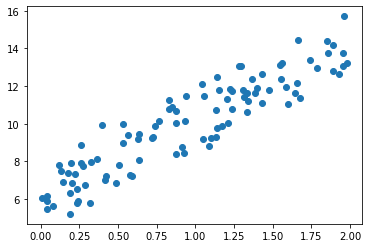

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y = 4X + 6 식을 근사(w1=4, w0=6). random 값은 Noise를 위해 만듬
X = 2 * np.random.rand(100,1)
y = 6 +4 * X+ np.random.randn(100,1)

# X, y 데이터 셋 scatter plot으로 시각화
plt.scatter(X, y)

데이터는 y = 4X + 6을 중심으로 무작위로 퍼져 있다. 
* 비용 함수 정의해보기 
비용 함수 get_cost()는 실제 y 값과 예측된 y 값을 인자로 받아서 계산한다.

In [ ]:
def get_cost(y, y_pred):
    N = len(y) 
    cost = np.sum(np.square(y - y_pred))/N
    return cost

In [ ]:
# w1 과 w0 를 업데이트 할 w1_update, w0_update를 반환. 
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)
    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0 값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    # 예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y-y_pred
         
    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성 
    w0_factors = np.ones((N,1))

    # w1과 w0을 업데이트할 w1_update와 w0_update 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))    
    
    return w1_update, w0_update

In [ ]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용함. 
def gradient_descent_steps(X, y, iters=10000):
    # w0와 w1을 모두 0으로 초기화. 
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출하여 w1, w0 업데이트 수행. 
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
              
    return w1, w0

In [ ]:
def get_cost(y, y_pred):
    N = len(y) 
    cost = np.sum(np.square(y - y_pred))/N
    return cost

w1, w0 = gradient_descent_steps(X, y, iters=1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1:4.022 w0:6.162
Gradient Descent Total Cost:0.9935


실제 선형식인 y = 4X + 6과 유사하게 w1은 4.022, w0은 6.162가 도출되었다. 예측 오류 비용은 약 0.9935이다. 
* 앞에서 구한 y_pred에 기반해 회귀선 그리기

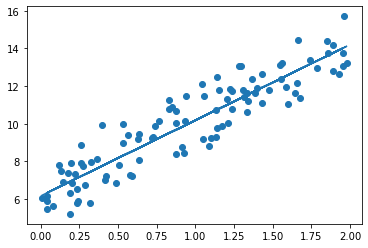

In [ ]:
plt.scatter(X, y)
plt.plot(X,y_pred)

일반적으로 경사 하강법은 모든 학습 데이터에 대해 반복적으로 비용함수 최소화를 위한 값을 업데이트하기 때문에 수행 시간이 매우 오래 걸린다는 단점이 있다. 그 때문에 실전에서는 대부분 확률적 경사 하강법(Stochastic Gradient Descent)를 이용한다. 
* 확률적 경사 하강법: 전체 입력 데이터로 w가 업데이트되는 값을 계산하는 것이 아니라 일부 데이터만 이용해 w가 업데이트되는 값을 계산하므로 경사 하강법에 비해서 빠른 속도를 보장한다. 따라서 대용량의 데이터의 경우 대부분 확률적 경사 하강법이나 미니 배치 확률적 경사 하강법을 이용해 최적 비용함수를 도출한다. 
* (미니 배치) 확률적 경사 하강법 
  * stochastic_gradient_descent_steps(): X, y 데이터에서 랜덤하게 batch_size 만큼 데이터를 추출해 이를 기반으로 w1_update,                                          w0_update를 계산하는 부분이 차이가 있다. 
 

In [ ]:
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index =0
    
    for ind in range(iters):
        np.random.seed(ind)
        # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터 추출하여 sample_X, sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    
    return w1, w0

* w1, w0 및 예측 오류 비용 계산하기

In [ ]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print("w1:",round(w1[0,0],3),"w0:",round(w0[0,0],3))
y_pred = w1[0,0] * X + w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1: 4.028 w0: 6.156
Stochastic Gradient Descent Total Cost:0.9937


(미니 배치) 확률적 경사 하강법으로 구한 w0, w1 결과는 경사 하강법으로 구한 w1, w0와 큰 차이가 없으며, 예측 오류 비용 또한 0.9937로 경사 하강법으로 구한 예측 오류 비용 0.9935보다 아주 조금 높을 뿐으로 큰 예측 성능상의 차이가 없다. 따라서 큰 데이터를 처리할 경우에는 경사 하강법은 매우 오랜 시간이 걸리므로 일반적으로 확률적 경사 하강법을 이용합니다.  

## 05. 다항 회귀와 과(대)적합/과소적합 이해
---
### 다항 회귀 이해 
* 다항(Polynomial) 회귀: 회귀가 독립변수의 단항식이 아닌 2차, 3차 방정식과 같은 다항식으로 표현되는 것

**다항 회귀는 선형 회귀이다. 회귀에서 선형/비선형 회귀를 나누는 기준은 회귀 계수가 선형/비선형인지에 따른 것이지 독립변수의 선형/비선형 여부와는 무관하다.**     


사이킷런은 다항 회귀를 위한 클래스를 명시적으로 제공하지 않는다. 대신 다항 회귀 역시 선형 회귀이기 때문에 비선형 함수를 선형 모델에 적용시키는 방법을 사용해 구현한다. 이를 위해 사이킷런은 PolynomialFeatures 클래스를 통해 피처를 Polynomial(다항식) 피처로 변환한다. 
* PolynomialFeatures 클래스: degree 파라미터를 통해 입력 받은 단항식 피처를 degree에 해당하는 다항식 피처로 변환한다. 다른 전처리 변환 클래스와 마찬가지로 fit(), transform() 메서드를 통해 이 같은 변환 작업을 수행한다. 


* PolynomialFeatures 클래스로 다항식 변환


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 단항식 생성, [[0,1],[2,3]]의 2X2 행렬 생성
X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature:\n',X )

# degree = 2 인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용하여 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 feature:\n', poly_ftr)

일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 feature:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


* 3차 다항 계수를 이용해 3차 다항 회귀 함수식을 PolynomialFeatures와 LinearRegression 클래스를 이용해 유도하기     
결정값을 구하는 3차 다항 회귀 함수를 임의로 설정하고 이것의 회귀 계수를 예측할 것이다. 먼저 다항 회귀의 결정 함수식은 y = 1+ 2x1 + 3x1^2 + 4x2^3로 설정하고 이를 위한 함수 polynomial_func()를 만든다. 해당 함수는 3차 다항 계수 피처 값이 입력되면 결정 값을 반환한다. 

In [ ]:
def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    print(X[:, 0])
    print(X[:, 1])
    return y

X = np.arange(0,4).reshape(2,2)

print('일차 단항식 계수 feature: \n' ,X)
y = polynomial_func(X)
print('삼차 다항식 결정값: \n', y)

일차 단항식 계수 feature: 
 [[0 1]
 [2 3]]
[0 2]
[1 3]
삼차 다항식 결정값: 
 [  5 125]


일차 단항식 계수를 삼차 다항식 계수로 변환하고, 이를 선형 회귀에 적용하면 다항 회귀로 구현된다. 

In [ ]:
# 3 차 다항식 변환 
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature: \n',poly_ftr)

# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(poly_ftr,y)
print('Polynomial 회귀 계수\n' , np.round(model.coef_, 2))
print('Polynomial 회귀 Shape :', model.coef_.shape)

3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape : (10,)


일차 단항식 계수 피처는 2개였지만, 3차 다항식 Polynomial 변환 이후에는 다항식 계수 피처가 10개로 늘어난다. 이 피처 데이터 세트에 LinearRegression을 통해 3차 다항 회귀 형태의 다항 회귀를 적용하면 회귀 계수가 10개로 늘어난다. 10개의 회귀 계수 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]가 도출됐으며 원래 다항식 1+2x1+3x1^2+4x2^3의 계수 값인 [1, 2, 0, 3, 0, 0, 0, 0, 0, 4]와는 차이가 있지만 다항 회귀로 근사하고 있다. **이처럼 사이킷런은 PolynomialFeatures로 피처를 변환한 후에 LinearRegression 클래스로 다항 회귀를 구현한다.**
* 사이킷런 파이프라인(Pipeline)을 이용하여 3차 다항회귀 학습    

사이킷런의 Pipeline 객체는 Feature 엔지니어링 변환과 모델 학습/예측을 순차적으로 결합해준다.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3 
    return y

# Pipeline 객체로 Streamline 하게 Polynomial Feature변환과 Linear Regression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())])
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X, y)
print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


### 다항 회귀를 이용한 과소적합 및 과적합 이해
다항 회귀를 피처의 직선적 관계가 아닌 복잡한 다항 관계를 모델링할 수 있다. 다항식의 차수가 높아질수록 매우 복잡한 피처 간의 관계까지 모델링이 가능하다. 하지만 다항 회귀의 차수(degree)를 높일수록 학습 데이터에만 너무 맞춘 학습이 이뤄져서 정작 테스트 데이터 환경에서는 오히려 예측 정확도가 떨어진다. 즉 차수가 높아질수록 과적합의 문제가 크게 발생한다.      


* 다항 회귀를 이용해 과소적합/과적합 문제 보여주는 예제    
원래 데이터 세트는 피처 X와 target y가 잡음(Noise)이 포함된 다항식의 코사인(Cosaine) 그래프 관계를 가지도록 만들어준다. 그리고 이에 기반해 다항 회귀의 차수를 변화시키면서 그에 따른 회귀 예측 곡선과 예측 정확도를 비교하는 예제이다. 학습 데이터는 30개의 임의의 데이터인 X, X의 코사인 값에서 약간의 잡음 변동 값을 더한 target인 y로 구성된다.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# random 값으로 구성된 X값에 대해 Cosaine 변환값을 반환. 
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

# X는 0 부터 1까지 30개의 random 값을 순서대로 sampling 한 데이타 입니다.  
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y 값은 cosine 기반의 true_fun() 에서 약간의 Noise 변동값을 더한 값입니다. 
y = true_fun(X) + np.random.randn(n_samples) * 0.1

* 예측 결과를 비교할 다항식 차수를 각각 1, 4, 15로 변경하면서 예측 결과 비교하기          
다항식 차수별로 학습을 수행한 뒤 cross_val_score()로 MSE 값을 구해 차수별 예측 성능을 평가한다. 그리고 0부터 1까지 균일하게 구성된 100개의 테스트용 데이터 세트를 이용해 차수별 회귀 예측 곡선을 그려본다.


Degree 1 회귀 계수는 [-1.61] 입니다.
Degree 1 MSE 는 0.41 입니다.

Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26] 입니다.
Degree 4 MSE 는 0.04 입니다.

Degree 15 회귀 계수는 [-2.98295000e+03  1.03899930e+05 -1.87417069e+06  2.03717225e+07
 -1.44873988e+08  7.09318780e+08 -2.47066977e+09  6.24564048e+09
 -1.15677067e+10  1.56895696e+10 -1.54006776e+10  1.06457788e+10
 -4.91379977e+09  1.35920330e+09 -1.70381654e+08] 입니다.
Degree 15 MSE 는 182815433.54 입니다.


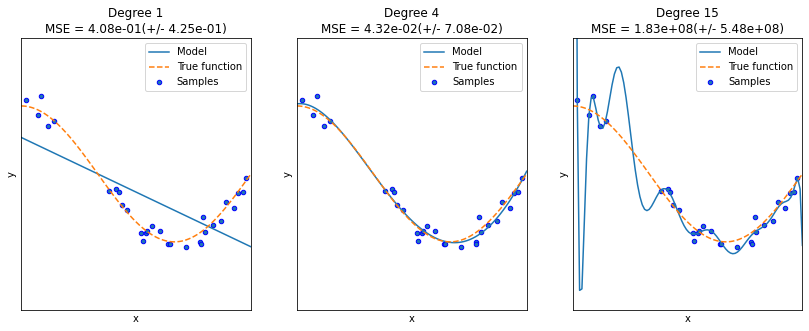

In [ ]:
plt.figure(figsize=(14, 5))
degrees = [1, 4, 15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교합니다. 
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())
    
    # 개별 degree별로 Polynomial 변환합니다. 
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)
    
    # 교차 검증으로 다항 회귀를 평가합니다. 
    scores = cross_val_score(pipeline, X.reshape(-1,1), y,scoring="neg_mean_squared_error", cv=10)
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients, 2)))
    print('Degree {0} MSE 는 {1:.2f} 입니다.'.format(degrees[i] , -1*np.mean(scores)))
    
    # 0 부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행합니다. 
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교합니다.  
    X_test = np.linspace(0, 1, 100)
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model") 
    # 실제 값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    
    plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0, 1)); plt.ylim((-2, 2)); plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))

plt.show()

실선으로 표현된 예측 곡선은 다항 회귀 예측 곡선이다. 점선으로 표현된 곡선은 실제 데이터 세트 X, Y의 코사인 곡선이다. 학습 데이터는 0부터 1까지의 30개의 임의의 X 값과 그에 따른 코사인 Y 값에 잡음을 변동 값으로 추가해 구성했으며  MSE 평가는 학습 데이터를 10개의 교차 검증 세트로 나누어 측정해서 평균한 것이다. 
* Degree 1 예측 곡선: 단순한 직선으로 단순 선형 회귀와 똑같다. 실제 데이터 세트인 코사인 데이터 세트를 직선으로 예측하기는 너무 단순해 보인다. 예측 곡선이 학습 데이터의 패턴을 제대로 반영하지 못하고 있는 과소적합 모델이 되었다. MSE 값은 약 0.407이다.
* Degree 4 예측 곡선: 실제 데이터 세트와 유사한 모습이다. 비교적 데이터 세트를 잘 반영해 코사인 곡선 기반으로 테스트 데이터를 잘 예측한 곡선을 가진 모델이다. MSE 값은 약 0.043으로 가장 뛰어난 예측 성능을 나타내고 있다. 
* Degree 15: MSE 값이 매우 큰 오류가 발생했다. 데이터 세트의 변동 잡음 값까지 지나치게 반영한 결과, 예측 곡선이 학습 데이터 세트만 정확히 예측하고, 테스트 값의 실제 곡선과는 완전히 다른 형태의 예측 곡선이 만들어졌다. 결과적으로 학습 데이터에 너무 충실하게 맞춘 과적합이 심한 모델이 되었고 어이없는 수준의 높은 MSE 값이 나왔다. 

### 편향-분산 트레이드오프(Bias-Variance Trade-off)
편향-분산 트레이드오프는 머신러닝이 극복해야 할 가장 중요한 이슈 중의 하나이다. 앞의 Degree 1과 같은 모델은 매우 단순화된 모델로서 지나치게 한 방향성으로 치우친 경향이 있는데, 이런 모델을 고편향(High Bias)성을 가졌다고 표현한다. 반대로 Degree 15와 같은 모델은 학습 데이터 하나 하나의 특성을 반영하면서 매우 복잡한 모델이 되었고 지나치게 높은 변동성을 가지게 되었다. 이런 모델을 고분산(High Variance)성을 가졌다고 표현한다.      

일반적으로 편향과 분산은 한 쪽이 높으면 한 쪽이 낮아지는 경향이 있다. 즉, 편향이 높으면 분산은 낮아지고(과소적합) 반대로 분산이 높으면 편향이 낮아진다(과적합).     

편향이 너무 높으면 전체 오류가 높다. 편향을 점점 낮추면 동시에 분산이 높아지고 전체 오류도 낮아진다. 편향을 낮추고 분산을 높이면 전체 오류가 가장 낮아지는 '골디락스' 지점을 통과하면서 분산을 지속적으로 높이면 전체 오류 값이 오히려 증가하면서 예측 성능이 다시 저하된다.

높은 편향/낮은 분산에서 과소적합되기 쉬우며 낮은 편향/높은 분산에서 과적합되기 쉽다. 편향과 분산이 서로 트레이드오프를 이루면서 오류 Cost 값이 최대로 낮아지는 모델을 구축하는 것이 가장 효율적인 머신러닝 예측 모델을 만드는 방법이다.


## 06. 규제 선형 모델 - 릿지, 라쏘, 엘라스틱넷
---
### 규제 선형 모델의 개요
이전까지 선형 모델의 비용 함수는 RSS를 최소화하는, 즉 실제 값과 예측값의 차이를 최소화하는 것만 고려했다. 그러다 보니 학습 데이터에 지나치게 맞추게 되고, 회귀 계수가 쉽게 커졌다. 이럴 경우 오히려 변동성이 오히려 심해져서 테스트 데이터 세트에서는 예측 성능이 저하되기 쉽다. 이를 반영해 비용 함수는 학습 데이터의 잔차 오류 값을 최소로 하는 RSS 최소화 방법과 과적합을 방지하기 위해 회귀 계수 값이 커지지 않도록 하는 방법이 서로 균형을 이뤄야 한다.    
 
이렇게 회귀 계수의 크기를 제어해 과적합을 개선하려면 비용(Cost) 함수의 목표가 다음과 같이 RSS(W) + alpha*|W|2 를 최소화하는 것으로 변경될 수 있다.      

alpha는 학습 데이터 적합 정도와 회귀 계수 값의 크기 제어를 수행하는 튜닝 파라미터이다. alpha 값을 크게 하면 비용 함수는 회귀 계수 W의 값을 작게 해 과적합을 개선할 수 있으며 alpha 값을 작게 하면 회귀 계수 W의 값이 커져도 어느 정도 상쇄가 가능하므로 학습 데이터 적합을 더 개선할 수 있다. 

alpha를 0에서부터 지속적으로 값을 증가시키면 회귀 계수 값의 크기를 감소시킬 수 있다. 
* **Regularization(규제): 비용 함수에 alpha 값으로 패널티를 부여해 회귀 계수 값의 크기를 감소시켜 과적합을 개선하는 방식. 규제는 크게 L1, L2 방식으로 구분된다.**
  * **L2 규제: alpha*|W|2와 같이 W의 제곱에 대해 패널티를 부여한다. L2 규제를 적용한 회귀를 릿지(Ridge) 회귀라고 한다.**  
  * **L1 규제: alpha*|W|1와 같이 W의 절대값에 대해 패널티를 부여한다. L1 규제를 적용하면 영향력이 크지 않은 회귀 계수 값을 0으로 변환한다. 라쏘(Lasso) 회귀는 L1 규제를 적용한 회귀이다.**
  
  
  


### 릿지 회귀
사이킷런은 Ridge 클래스를 통해 릿지 회귀를 구현한다. Ridge 클래스의 주요 생성 파라미터는 alpha이며, 이는 릿지 회귀의 alpha L2 규제 계수에 해당한다. 앞 예제의 보스턴 주택 가격을 Ridge 클래스를 이용해 다시 예측하고, 예측 성능을 평가해보자. 앞의 LinearRegression 예제에서 사용한 피처 데이터 세트인 X_data, Target 데이터 세트인 y_target을 그대로 이용한다.

In [ ]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

# boston 데이타셋 로드
boston = load_boston()

# boston 데이타셋 DataFrame 변환 
bostonDF = pd.DataFrame(boston.data , columns = boston.feature_names)

# boston dataset의 target array는 주택 가격임. 이를 PRICE 컬럼으로 DataFrame에 추가함. 
bostonDF['PRICE'] = boston.target
print('Boston 데이타셋 크기 :',bostonDF.shape)

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)

Boston 데이타셋 크기 : (506, 14)


C:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :fun

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# alpha=10으로 설정해 릿지 회귀 수행
ridge = Ridge(alpha = 10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-11.422 -24.294 -28.144 -74.599 -28.517]
 5 folds 의 개별 RMSE scores :  [3.38  4.929 5.305 8.637 5.34 ]
 5 folds 의 평균 RMSE : 5.518 


릿지의 5개 폴드 세트의 평균 RMSE가 5.518이다. 앞 예제의 규제가 없는 LinearRegression의 RMSE 평균인 5.829보다 더 뛰어난 예측 성능을 보여준다.      
* 이번에는 릿지의 alpha 값을 0, 0.1, 1, 10, 100으로 변화시키면서 RMSE와 회귀 계수 값의 변화를 살펴보기           
alpha 값을 변화하면서 RMSE 값과 각 피처의 회귀 계수를 시각화하고 DataFrame에 저장한다. **릿지 회귀는 alpha 값이 커질수록 회귀 계수 값을 작게 만든다.** 먼저 alpha 값의 변화에 따른 5 폴드의 RMSE 평균값을 반환하는 코드부터 작성하겠다.

In [ ]:
# Ridge에 사용될 alpha 파라미터의 값들을 정의
alphas = [0 , 0.1 , 1 , 10 , 100]

# alphas list 값을 iteration하면서 alpha에 따른 평균 rmse 구함.
for alpha in alphas :
    ridge = Ridge(alpha = alpha)
    
    #cross_val_score를 이용하여 5 fold의 평균 RMSE 계산
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f} '.format(alpha,avg_rmse))

alpha 0 일 때 5 folds 의 평균 RMSE : 5.829 
alpha 0.1 일 때 5 folds 의 평균 RMSE : 5.788 
alpha 1 일 때 5 folds 의 평균 RMSE : 5.653 
alpha 10 일 때 5 folds 의 평균 RMSE : 5.518 
alpha 100 일 때 5 folds 의 평균 RMSE : 5.330 


alpha가 100일 때 평균 RMSE가 5.330로 가장 좋다. 
* 이번엔 alpha 값의 변화에 따른 피처의 회귀 계수 값을 가로 막대 그래프로 시각화해보기      
회귀 계수를 Ridge 객체의 coef_ 속성에 추출한 뒤에 Series 객체로 만들어서 시본 가로 막대 차트로 표시하고, DataFrame에 alpha 값별 회귀 계수로 저장한다. 


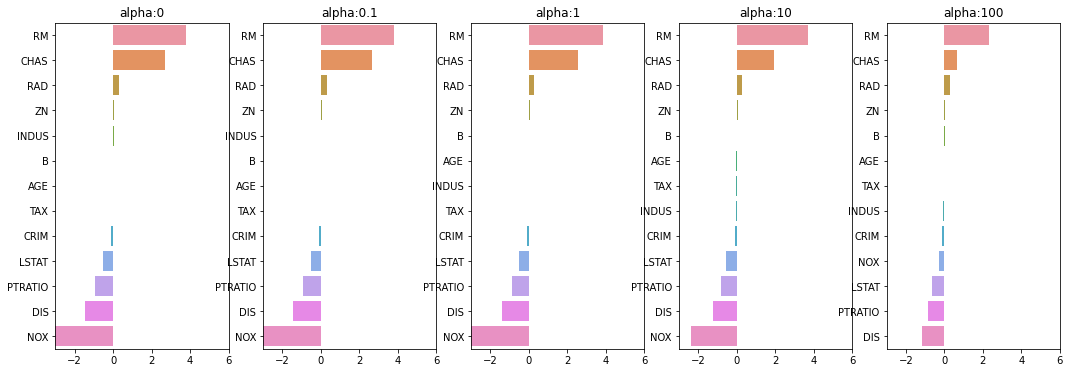

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성  
fig , axs = plt.subplots(figsize=(18,6) , nrows=1 , ncols=5)
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성  
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos , alpha in enumerate(alphas) :
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_data , y_target)
    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가.  
    coeff = pd.Series(data=ridge.coef_ , index=X_data.columns )
    colname='alpha:'+str(alpha)
    coeff_df[colname] = coeff
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values , y=coeff.index, ax=axs[pos])

# for 문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()

alpha 값을 계속 증가시킬수록 회귀 계수 값은 지속적으로 작아진다. 특히 NOX 피처의 경우 alpha 값을 계속 증가시킴에 따라 회귀 계수가 크게 작아지고 있다. 
* DataFrame에 저장된 alpha 값의 변화에 따른 릿지 회귀 계수 값을 구해보기

In [ ]:
ridge_alphas = [0 , 0.1 , 1 , 10 , 100]
sort_column = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


alpha 값이 증가하면서 회귀 계수가 지속적으로 작아지고 있다. 하지만 **릿지 회귀의 경우에는 회귀 계수를 0으로 만들지는 않는다.**

### 라쏘 회귀
**W의 절대값에 패널티를 부여하는 L1 규제를 선형 회귀에 적용한 것이 라쏘(Lasso)회귀이다. 즉 L1 규제는 alpha*|W|를 의미하며, 라쏘 회귀 비용함수의 목표는 RSS(W) + alpha*|W| 식을 최소화하는 W를 찾는 것이다. L2 규제가 회귀 계수의 크기를 감소시키는데 반해, L1 규제는 불필요한 회귀 계수를 급격하게 감소시켜 0으로 만들고 제거한다. 이러한 측면에서 L1 규제는 적절한 피처만 회귀에 포함시키는 피처 선택의 특성을 가지고 있다.**     

사이킷런은 Lasso 클래스를 통해 라쏘 회귀를 구현한다. Lasso 클래스의 주요 생성 파라미터는 alpha이며, 이는 라쏘 회귀의 alpha L1 규제 계수에 해당한다. 이 Lasso 클래스를 이용해 바로 이전의 릿지 회귀 예제 코드와 유사하게 라쏘의 alpha 값을 변화시키면서 RMSE와 각 피처의 회귀 계수를 출력해보자 get_linear_reg_eval()는 인자로 회귀 모델의 이름, alpha값들의 리스트, 피처 데이터 세트와 타깃 데이터 세트를 입력 받아서 alpha 값에 따른 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환한다.  


In [ ]:
from sklearn.linear_model import Lasso, ElasticNet

# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환 
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, 
                        verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose : print('####### ', model_name , '#######')
    for param in params:
        if model_name =='Ridge': model = Ridge(alpha=param)
        elif model_name =='Lasso': model = Lasso(alpha=param)
        elif model_name =='ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7) # alpha 값의 변화만 살피기 위해 고정함 
        neg_mse_scores = cross_val_score(model, X_data_n, 
                                             y_target_n, scoring="neg_mean_squared_error", cv = 5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param, avg_rmse))
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
        
        model.fit(X_data_n , y_target_n)
        if return_coeff:
            # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가. 
            coeff = pd.Series(data=model.coef_ , index=X_data_n.columns )
            colname='alpha:'+str(param)
            coeff_df[colname] = coeff
    
    return coeff_df
# end of get_linear_regre_eval

함수를 생성했으면 이를 이용해 alpha 값의 변화에 따른 RMSE와 그때의 회귀계수들을 출력해 보겠다. alpha값은 [0.07, 0.1, 0.5, 1, 3]로 입력하겠다. get_linear_reg_eval()에 모델명을 'Lasso'로 입력하면 라쏘 모델 기반으로 수행한다. 

In [ ]:
# 라쏘에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
lasso_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df =get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_data, y_target_n=y_target)

#######  Lasso #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.612 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.615 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.669 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.776 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.189 


alpha가 0.07일 때 가장 좋은 평균 RMSE를 보여준다. 앞의 릿지 평균 5.518보다 약간 떨어지는 수치지만, LinearRegression 평균인 5.829보다는 향상됐다. 
* 다음은 alpha 값에 따른 피처별 회귀 계수이다.

In [ ]:
# 반환된 coeff_lasso_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


alpha의 크기가 증가함에 따라 일부 피처의 회귀 계수는 아예 0으로 바뀌고 있다. NOX 속성은 alpha가 0.07일 때부터 회귀 계수가 0이며, alpha를 증가시키면서 INDUS, CHAS와 같은 속성의 회귀 계수가 0으로 바뀐다. 회귀 계수가 0인 피처는 회귀 식에서 제외되면서 피처 선택의 효과를 얻을 수 있다. 

### 엘라스틱넷 회귀
**엘라스틱넷(Elastic Net) 회귀는 L2 규제와 L1 규제를 결합한 회귀이다. 따라서 엘라스틱넷 회귀 비용함수의 목표는 RSS(W) + alpha2*|W|2 +  alpha1*|W|1 식을 최소화하는 W를 찾는 것이다. 엘라스틱넷은 라쏘 회귀가 서로 상관관계가 높은 피처들의 경우에 이들 중에서 중요 피처만을 셀렉션하고 다른 피처들은 모두 회귀 계수를 0으로 만드는 성향이 강하다. 특히 이러한 성향으로 인해 alpha 값에 따라 회귀 계수의 값이 급격히 변동할 수도 있는데, 엘라스틱넷 회귀는 이를 완화하기 위해 L2 규제를 라쏘 회귀에 추가한 것이다. 반대로 엘라스틱넷 회귀의 단점은 L1과 L2 규제가 결합된 규제로 인해 수행시간이 상대적으로 오래 걸린다는 것이다.**      

사이키런은 ElasticNet 클래스를 통해서 엘라스틱넷 회귀를 구현한다. ElasticNet 클래스의 주요 생성 파라미터는 alphad와 l1_ratio이다. ElasticNet 클래스의 alpha는 Ridge와 Lasso 클래스의 alpha값과는 다르다. 엘라스틱넷의 규제는 a*L1 + b*L2로 정의될 수 있ㅇ며, 이 때 a는 L1 규제의 alpha값, b는 L2 규제의 alpha값이다. 따라서 ElasticNet 클래스의 alpha 파라미터 값은 a + b이다. 엘라스틱넷 클래스의 l1_ratio 파라미터 값은 a / (a+b) 이다. l1_ratio가 0이면 a가 0이므로 L2 규제와 동일하다. l1_ratio가 1이면 b가 0이므로 L1 규제와 동일하다.        

* 엘라스틱넷 클래스를 이용해 바로 이전의 릿지, 라쏘 회귀 예제 코드와 유사하게 엘라스틱넷 alpha 값을 변화시키면서 RMSE와 각 피처의 회귀 계수를 출력해보기

In [ ]:
# 엘라스틱넷에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
# l1_ratio는 0.7로 고정
elastic_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df =get_linear_reg_eval('ElasticNet', params=elastic_alphas,
                                      X_data_n=X_data, y_target_n=y_target)

#######  ElasticNet #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.542 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.526 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.467 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.597 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.068 


In [ ]:
# 반환된 coeff_elastic_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000


alpha 0.5일 때 RMSE가 5.467로 가장 좋은 예측 성능을 보이고 있다. alpha값에 따른 피처들의 회귀 계수들 값이 라쏘보다는 상대적으로 0이 되는 값이 적다.       

릿지, 라쏘, 엘라스틱넷 회귀 중에 어떤 것이 가장 좋은지는 상황에 따라 다르다. 각각의 알고리즘에서 하이퍼 파라미터를 변경해 가면서 최적의 예측 성능을 찾아내야한다.

### 선형 회귀 모델을 위한 데이터 변환 
선형 회귀 모델과 같은 선형 모델은 일반적으로 피처와 타깃값 간에 선형의 관계가 있다고 가정하고, 이러한 최적의 선형함수를 찾아내 결과값을 예측한다. 또한 선형 회귀 모델은 피처값과 타깃값의 분포가 정규 분포(평균을 중심으로 종 모양으로 데이터 값이 분포된 형태) 형태를 매우 선호한다. 특히 타깃값의 경우 정규 분포 형태가 아니라 특정값의 분포가 치우친 왜곡(Skew)된 형태의 분포도일 경우 예측 성능에 부정적인 영향을 미칠 가능성이 높다. 피처값 역시 결정값보다는 덜하지만 왜곡된 분포도로 인해 예측 성능에 부정적인 영향을 미칠 수 있다. 따라서 선형 회귀 모델을 적용하기 전에 먼저 데이터에 대한 스케일링/정규화 작업을 수행하는 것이 일반적이다. 하지만 이러한 스케일링/정규화 작업을 선행한다고 해서 무조건 예측 성능이 향상되는 것은 아니다. 일반적으로 중요 피처들이나 타깃값의 분포도가 심하게 왜곡됐을 경우에 이러한 변환 작업을 수행한다.      

* 사이킷런을 이용해 피처 데이터 세트에 적용하는 변환 작업 방법 
1. StandardScaler 클래스를 이용한 평균이 0, 분산이 1인 표준 정규 분포를 가진 데이터 세트로 변환하거나 MinMaxScaler 클래스를 이용해 최솟값이 0이고 최댓값이 1인 값으로 정규화를 수행한다.       
2. 스케일링/정규화를 수행한 데이터 세트에 다시 다항 특성을 적용하여 변환하는 방법이다. 보통 1번 방법을 통해 예측 성능에 향상이 없을 경우 이와 같은 방법을 적용한다.         
3. 원래 값에 log 함수를 적용하면 보다 정규 분포에 가까운 형태로 값이 분포된다. 이러한 변환을 로그 변환(Log Transformation)이라고 부른다. 로그 변환은 매우 유용한 변환이며, 실제로 선형 회귀에서는 앞에서 소개한 1, 2번 방법보다 로그 변환이 훨씬 많이 사용되는 변환 방법이다. 왜냐하면 1번 방법의 경우 예측 성능 향상을 크게 기대하기 여러운 경우가 많으며 2번 방법의 경우 피처의 개수가 매우 많을 경우에는 다항 변환으로 생성되는 피처의 개수가 기하급수로 늘어나서 과적합의 이슈가 발생할 수 있기 때문이다.        


**타깃값의 경우는 일반적으로 로그 변환을 적용한다. 결정 값을 정규 분포나 다른 정규값으로 변환하면 변환된 값을 다시 원본 타깃값으로 원복하기 어려울 수 있다. 왜곡된 분포도 형태의 타깃값을 로그 변환하여 예측 성능 향상이 된 경우가 많은 사례에서 검증되었기 때문에 타깃값의 경우는 로그 변환을 적용한다.**


* 보스턴 주택가격 피처 데이터 세트에 위에서 언급한 표준 정규 분포 변환, 최대값/최소값 정규화, 로그 변환을 차례로 적용한 후에 RMSE로 각 경우별 예측 성능을 측정해보기          
  * get_scaled_data() 함수: method 인자로 변환 방법을 결정하며 표준 정규 분포 변환(Standard), 최대값/최솟값 정규화(MinMax), 로그 변환(Log) 중에 하나를 선택한다. p_degree는 다항식 특성을 추가할 때 다항식 차수가 입력된다. 다항식 차수는 2를 넘기지 않는다. 그리고 로그 변환인 경우 예제 코드에서 np.log()가 아니라 np.log1p()를 이용했다. 일반적으로 log() 함수를 적용하면 언더 플로우가 발생하기 쉬워서 1+log() 함수를 적용하는데 이를 구현한 것이 np.log1p()이다. 

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

# method는 표준 정규 분포 변환(Standard), 최대값/최소값 정규화(MinMax), 로그변환(Log) 결정
# p_degree는 다향식 특성을 추가할 때 적용. p_degree는 2이상 부여하지 않음. 
def get_scaled_data(method='None', p_degree=None, input_data=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data

    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree, 
                                         include_bias=False).fit_transform(scaled_data)
    
    return scaled_data

* 이제 Ridge 클래스의 alpha 값을 변화시키면서 피처 데이터 세트를 여러 가지 방법으로 변환한 데이터 세트를 입력 받을 경우에 RMSE 값이 어떻게 변하는지 살펴보기        
  * 피처 데이터의 변환 방법 5가지: (None, None)은 아무런 변환을 하지 않은 원본 데이터, ('Standard', None)은 표준 정규 분포, ('Standard', 2)는 표준 정규 분포를 다시 2차 다항식 변환, ('MinMax', None)은 최솟값/최댓값 정규화, ('MinMax', 2)는 최솟값/최댓값 정규화를 다시 2차 다항식 변환, ('Log', None)은 로그 변환이다. 

In [ ]:
# Ridge의 alpha값을 다르게 적용하고 다양한 데이터 변환방법에 따른 RMSE 추출. 
alphas = [0.1, 1, 10, 100]

# 5개 방식으로 변환. 원본 그대로, 표준정규분포, 표준정규분포+다항식 특성
# 최대/최소 정규화, 최대/최소 정규화+다항식 특성, 로그변환 
scale_methods=[(None, None), ('Standard', None), ('Standard', 2), 
               ('MinMax', None), ('MinMax', 2), ('Log', None)]
for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(method=scale_method[0], p_degree=scale_method[1], 
                                    input_data=X_data)
    print('\n## 변환 유형:{0}, Polynomial Degree:{1}'.format(scale_method[0], scale_method[1]))
    get_linear_reg_eval('Ridge', params=alphas, X_data_n=X_data_scaled, 
                        y_target_n=y_target, verbose=False, return_coeff=False)


## 변환 유형:None, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.788 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.653 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.518 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 5.330 

## 변환 유형:Standard, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.826 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.803 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.637 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 5.421 

## 변환 유형:Standard, Polynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 8.827 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 6.871 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.485 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 4.634 

## 변환 유형:MinMax, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.764 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.465 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.754 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 7.635 

## 변환 유형:MinMax, Polynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.298 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 4.323 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.185 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 6.538 

## 변환 유형:Log, Polynomial Degree:None
alpha 0.1일 때 5 폴


결과를 보면 표준 정규 분포와 최솟값/최댓값 정규화로 피처 데이터 세트를 변경해도 성능상의 개선은 없다. 표준 정규 분포로 일차 변환 후 2차 다항식 변환을 했을 때 alpha=100에서 4.634 로 성능이 개선됐으며 최솟값/최댓값 정규화로 일차 변환 후 2차 다항식 변환을 했을 때 alpha=1에서 4.323으로 성능이 개선됐다. 하지만 다항식 변환은 앞에서 언급한 단점으로 인해 피처의 개수가 많을 경우 적용하기 힘들며, 데이터 건수가 많아지면 계산에 많은 시간이 소모되어 적용에 한계가 있다. 반면에 로그 변환을 보면 alpha가 0.1, 1, 10인 경우에 모두 좋은 성능 향상이 있음을 알 수 있다.        

**일반적으로 선형 회귀를 적용하려는 데이터 세트에 데이터 값의 분포가 심하게 왜곡되어 있을 경우에 이처럼 로그 변환을 적용하는 것이 좋은 결과를 기대할 수 있다.**

## 07. 로지스틱 회귀
---
로지스틱 회귀는 선형 회귀 방식을 분류에 적용한 알고리즘이다. 즉, 로지스틱 회귀는 분류에 사용된다. 로지스틱 회귀 역시 선형 회귀 계열이다. 회귀가 선형인가 비선형인가는 독립변수가 아닌 가중치(weight) 변수가 선형인지 아닌지를 따른다. 로지스틱 회귀가 선형 회귀와 다른 점은 학습을 통해 선형 함수의 회귀 최적선을 찾는 것이 아니라 시그모이드(Sigmoid) 함수 최적선을 찾고 이 시그모이드 함수의 반환 값을 확률로 간주해 확률에 따라 분류를 결정한다는 것이다.     

많은 자연, 사회 현상에서 특정 변수의 확률 값은 선형이 아니라 위의 시그모이드 함수와 같이 S자 커브 형태를 가진다. 시그모이드 함수는 x 값이 +,-로 아무리 커지거나 작아져도 y값은 항상 0과 1 사이 값을 반환한다. 